S0,N9 t:0.000000 0.093660 0.492600 0.585810 0.735260 0.828410 1.225710 1.319160 1.471310 
S1,N9 t:0.014750 0.108410 0.507350 0.600560 0.750010 0.843160 1.240460 1.333910 1.486060 
S2,N9 t:0.032760 0.126410 0.525350 0.618560 0.768010 0.861160 1.258460 1.351910 1.504060 
S3,N9 t:0.240250 0.333900 0.732850 0.826050 0.975510 1.068660 1.465960 1.559410 1.711560 
S4,N9 t:0.256600 0.350250 0.749200 0.842400 0.991860 1.085010 1.482310 1.575760 1.727910 
S5,N9 t:0.274100 0.367750 0.766700 0.859900 1.009360 1.102510 1.499810 1.593260 1.745410 
S6,N9 t:0.481600 0.575250 0.974200 1.067400 1.216860 1.310010 1.707310 1.800760 1.952910 
S7,N9 t:0.499300 0.592950 0.991900 1.085100 1.234560 1.327710 1.725010 1.818460 1.970610 
S8,N9 t:0.511050 0.604700 1.003650 1.096850 1.246310 1.339460 1.736760 1.830210 1.982360 
S9,N9 t:0.718560 0.812210 1.211160 1.304360 1.453810 1.546960 1.944260 2.037710 2.189860 
S10,N9 t:0.729060 0.822710 1.221660 1.314860 1.464310 1.557460 1.954760 2.048210 2.200360 
S11,N9 t:

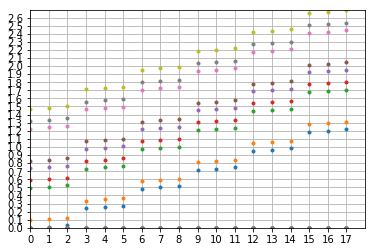

In [60]:
import matplotlib.pyplot as plt
import numpy as np

VT_WH = 6
VT_SS = 6
V0 = 20    #初始速度
V1 = 20    #中间速度
V2 = 20    #最终速度

SSA_NUM = 6           #传感器组数
WH_NUM = 9           #轴数

def v_cal(time):
    #t_v0_v1 = 3;    #初始速度到中间速度持续时间
    #t_v1_v2 = 3;    #中间速度到最终速度持续时间
    if(0 == vt_flag):
        return V0 + time*a
    #elif(time < t_v1_v2):
        #return v0 + time*(v2 - v1)/t_v1_v2
    else:
        return V1 + time*a


SS_NUM = SSA_NUM*3    #传感器数
WHR_NUM = WH_NUM * 2
T_1US = 0.000001
T_10US =  0.00001
sx = []    #传感器x坐标
wx = []    #车轴x坐标
wx_init = []
ds = []    #传感器间距
dw = []    #轴距
lwn = [0 for i in range(SS_NUM)]    #每个传感器的丢轴个数
rwn = [0 for i in range(SS_NUM)]    #每个传感器的多轴个数
swn = [WH_NUM for i in range(SS_NUM)]    #每个传感器经过的实际轮轴数，加上多轴，减去丢轴
ws = [0 for i in range(SS_NUM)]    #每个轴经过的传感器数

dt =  T_10US
t = [[0]*SS_NUM for i in range(WHR_NUM)]    #绝对时刻表
dwst = [[0]*SS_NUM for i in range(WHR_NUM)]    #相对时刻表
lost_ax = [[0]*SS_NUM for i in range(WH_NUM)]    #丢轴标志表
red_ax = [[0]*SS_NUM for i in range(WH_NUM)]    #多轴时间表
ws_order = [[0]*SS_NUM for i in range(WH_NUM)]

#丢轴设置
#lost_ax[10][9] = 1;
#lost_ax[12][9] = 1;
#lost_ax[10][11] = 1;
    
#多轴设置
#red_ax[7][6] = T_10US*5000;
#red_ax[14][6] = T_10US*5000;
#red_ax[16][6] = T_10US*5000;
#red_ax[2][9] = T_10US;

#sx = 0.0
#wx[0] = -1.0
ds = [0.295,0.360,4.150,0.327,0.350,4.150,0.354,0.235,4.150,0.210,0.350,4.150,0.206,0.344,4.150,0.223,0.345]
dw = [1.873,7.979,1.864,2.989,1.863,7.946,1.869,3.043,1.858,7.955,1.843,3.785,2.031,1.992,4.689,2.043,1.977]
#print(ds[0])
sx.append(0)
wx.append(0)
wx_init.append(0)
for i in range(0,SS_NUM-1):
    sx.append(sx[i]+ds[i])
for i in range(0,WH_NUM-1):
    wx.append(wx[i]-dw[i])
    wx_init.append(wx[i]-dw[i])
for i in range(0,SS_NUM-1):
    swn.append(WH_NUM)
for i in range(0,WH_NUM):
    ws.append(0)
time = 0
v = v_cal(0)
#t.append(0)
ws_order.append(0)
order = 0
vt_flag = 0
a = (V1**2 - V0**2)/2/(sx[VT_SS] - wx_init[VT_WH])
while(wx[WH_NUM-1] < sx[SS_NUM-1] + 30 * dt):
    for i in range(0,WH_NUM):
        for j in range(ws[i],SS_NUM):
            if wx[i] >= sx[j]:
                ws[i] += 1
                t[i][j] = time
                ws_order[i][j] = order
                order += 1
                if(VT_WH == i and VT_SS == j):
                    a = (V2**2 - V1**2)/2/((sx[SS_NUM-1] - sx[VT_SS]) + (wx_init[VT_WH] - wx_init[WH_NUM-1]))
                    vt_flag = 1
    v = v_cal(time)
    time += dt
    for i in range(0,WH_NUM):
        wx[i] += dt * v

#for i in range(0,WH_NUM):
#    print('')
#    for j in range(0,SS_NUM):
#        print('%8f ' % t[i][j],end = '')
        
#for i in range(0,WH_NUM):
#    print('')
#    for j in range(0,SS_NUM):
#        print('%4d ' % ws_order[i][j],end = '')

        
#//处理丢轴多轴
for j in range(0,SS_NUM):
    for i in range(0,WH_NUM):
        if lost_ax[i][j]:
            t[i][j] = 0
            swn[j] -= 1
            lwn[j] += 1
    for i in range(WH_NUM-1,0,-1):
        if red_ax[i][j] > T_1US:
            swn[j] += 1
            rwn[j] += 1
            for k in range(WH_NUM-1+rwn[j],i,-1):
                t[k][j] = t[k-1][j]
            t[i+1][j] = t[i][j] + red_ax[i][j]
#print('')
#print(t)
#%matplotlib qt
#fig1 = plt.figure('fig1')
#plt.grid(True)
#plt.xlim((0,SS_NUM))
#plt.ylim((0,max(t[max(swn)])))
#plt.xticks(np.arange(0,SS_NUM,1))
#plt.yticks(np.arange(0,4,0.1))
#plt.plot(list(map(list,(zip(*t)))),'.')
#plt.plot(list(map(list,(zip(*t))))[0:max(swn)],'.')
#fig1.show()

#//整理丢轴
for j in range(0,SS_NUM):
    for i in range(0,WH_NUM-1+rwn[j]):
        if(t[i][j] < T_1US):
            for k in range(i,WH_NUM-1+rwn[j]):
                if(i==0 & j==0):
                    continue
                else:
                    t[k][j] = t[k+1][j]

#//计算周期除了第0行后面的数据
for j in range(0,SS_NUM):
    for i in range(0,swn[j]-1):
        dwst[i+1][j] = t[i+1][j] - t[i][j]
#//计算第0行数据
for j in range(0,SS_NUM):
    dwst[0][j] = t[0][j]
dwst[0][0] = 0

#打印绝对时间表
for j in range(0,SS_NUM):
    print('S%d,N%d t:' % (j,swn[j]),end = '')
    for i in range(0,swn[j]):
        print('%7f ' % t[i][j],end = '')
    print('')

#封装报文
def crc_16_mb(buf,cnt):
    crc_tmp = 0xffff
    for i in range(0,cnt):
        crc_tmp ^= buf[i]
        for j in range(0,8):
            if crc_tmp & 0x01:
                crc_tmp = (crc_tmp >> 1) ^ 0xa001
            else:
                crc_tmp = crc_tmp >> 1
    return crc_tmp
        
        
frame = [[0]*(3*np.max(swn)+8) for i in range(SS_NUM)]    #相对时刻表
for j in range(0,SS_NUM):
    len = swn[j] * 3 + 8
    #frame[0:6][j] = [0x5a, 0xff,(len&0xff00)>>8,len&0xff,j,swn[j]]
    frame[j][0] = 0x5a
    frame[j][1] = 0xff
    frame[j][2] = (len&0xff00)>>8
    frame[j][3] = len&0xff
    frame[j][4] = j
    frame[j][5] = swn[j]
    for i in range(0,swn[j]):
        frame[j][3*i+6] = (int(dwst[i][j] * 100000.0) & 0xff0000) >> 16
        frame[j][3*i+7] = (int(dwst[i][j] * 100000.0) & 0x00ff00) >> 8
        frame[j][3*i+8] = (int(dwst[i][j] * 100000.0) & 0x0000ff) >> 0
    crc = crc_16_mb(frame[j],3*swn[i]+6)
    frame[j][3*swn[i]+6] = (crc & 0xff00) >> 8
    frame[j][3*swn[i]+7] = (crc & 0x00ff) >> 0
    
#打印报文
for j in range(0,SS_NUM):
    #len = swn[j] * 3 + 8
    print('S%02d,N%d t:' % (j,swn[j]),end = '')
    #print('5a ff %02x %02x %02x %02x ' % ((len&0xff00)>>8,len&0xff,j,swn[j]),end = '')
    for i in range(0,3*swn[i]+8):
        print('%02x ' % frame[j][i],end = '')
    print('')

        
#%matplotlib qt
#fig2 = plt.figure('absolute time table')
plt.grid(True)
plt.xlim((0,SS_NUM))
plt.ylim(0,max(t[WH_NUM-1]))
plt.xticks(np.arange(0,SS_NUM,1))
plt.yticks(np.arange(0,max(t[WH_NUM-1]),0.1))
plt.plot(list(map(list,(zip(*t)))),'.')
plt.show()
#fig2.show()
#print(dwst)
#for j in range(0,SS_NUM):
#    for i in range(0,swn[j]):
#        print('t[%d][%d]=%10f ' % (i,j,t[i][j]))
        
#print(rwn)
#for j in range(SS_NUM-1,-1,-1):
#    print(j)
#for i in range(0,WH_NUM):
    #print(i,wx[i])

#%matplotlib qt
#plt.plot(t[0:max(swn)],'.')
#plt.grid(True)
#plt.show()



In [55]:
print(dwst[0][3])

0
